In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 11.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import stanza
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: sentiment
INFO:stanza:Done loading processors!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Royal Mail Sentiment Analysis Project/Royal mail Data ratings new.csv")
df.head(10)

,author_name,Date Published,reviewBody,Annotations
0,LINDSAY HARGREAVES,8/8/2018,The lady I spoke to seem to talk over me.Alway...,0
1,Terence King,2/5/2022,Easy website to navigate but holding back pric...,0
2,Nick Sargent,3/2/2019,"nice website and great variety, but payment no...",0
3,Mrs Caira,9/9/2019,"Online redirection form failed first time, app...",0
4,Alan Carter,8/8/2018,"The site is not very custom frendly,you have t...",0
5,Joanna Rankin,2/5/2022,I redirected my post back in March for myself ...,0
6,Neil,3/2/2019,"Reasonable but could be more user friendly, su...",2
7,Christine Sifleet,9/9/2019,Very very expensive,1
8,David P,8/8/2018,Wasn't aware that charges were now applicable ...,1
9,Unhappy Customer,2/5/2022,Don’t see how you should register just to get ...,0


In [ ]:
df = df.drop(["author_name", "Date Published",], axis=1)
print(df.head(10))

                                          reviewBody Annotations
0  The lady I spoke to seem to talk over me.Alway...           0
1  Easy website to navigate but holding back pric...           0
2  nice website and great variety, but payment no...           0
3  Online redirection form failed first time, app...           0
4  The site is not very custom frendly,you have t...           0
5  I redirected my post back in March for myself ...           0
6  Reasonable but could be more user friendly, su...           2
7                                Very very expensive           1
8  Wasn't aware that charges were now applicable ...           1
9  Don’t see how you should register just to get ...           0


In [ ]:
print(df.head(10))

                                          reviewBody Annotations
0  The lady I spoke to seem to talk over me.Alway...           0
1  Easy website to navigate but holding back pric...           0
2  nice website and great variety, but payment no...           0
3  Online redirection form failed first time, app...           0
4  The site is not very custom frendly,you have t...           0
5  I redirected my post back in March for myself ...           0
6  Reasonable but could be more user friendly, su...           2
7                                Very very expensive           1
8  Wasn't aware that charges were now applicable ...           1
9  Don’t see how you should register just to get ...           0


In [ ]:
# Assuming 'df' is your DataFrame
df.drop(df[df['Annotations'] == 1].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df.head(10))

                                          reviewBody Annotations
0  The lady I spoke to seem to talk over me.Alway...           0
1  Easy website to navigate but holding back pric...           0
2  nice website and great variety, but payment no...           0
3  Online redirection form failed first time, app...           0
4  The site is not very custom frendly,you have t...           0
5  I redirected my post back in March for myself ...           0
6  Reasonable but could be more user friendly, su...           2
7                                Very very expensive           1
8  Wasn't aware that charges were now applicable ...           1
9  Don’t see how you should register just to get ...           0


In [ ]:
def my_function (df):
  text_list = []
  sentiment = []
  number_of_sentences = []
  number_of_positive_sentences = []
  number_of_negative_sentences = []
  number_of_neutral_sentences = []


  for text in df["reviewBody"]:
    doc = nlp(text)
    total_sentiment = 0
    numb_of_sentence = 0
    numb_of_positive = 0
    numb_of_negative = 0
    numb_of_neutral = 0
    for sentence in doc.sentences:
      total_sentiment = total_sentiment + sentence.sentiment
      numb_of_sentence = numb_of_sentence + 1
      if sentence.sentiment > 1:
        numb_of_positive = numb_of_positive + 1
      elif sentence.sentiment < 1:
        numb_of_negative = numb_of_negative + 1
      else:
        numb_of_neutral = numb_of_neutral + 1


    avg_sentiment = total_sentiment / numb_of_sentence
    text_list.append(text)
    sentiment.append(avg_sentiment)
    number_of_sentences.append(numb_of_sentence)
    number_of_positive_sentences.append(numb_of_positive)
    number_of_negative_sentences.append(numb_of_negative)
    number_of_neutral_sentences.append(numb_of_neutral)

  result = pd.DataFrame({'text': text_list,'sentiment': sentiment,'number_of_sentences': number_of_sentences,'positive':number_of_positive_sentences, 'negative':number_of_negative_sentences,'neutral':number_of_neutral_sentences})
  return result

In [ ]:
det = my_function(df)
det

,text,sentiment,number_of_sentences,positive,negative,neutral
0,The lady I spoke to seem to talk over me.Alway...,0.666667,6,1,3,2
1,Easy website to navigate but holding back pric...,0.000000,2,0,2,0
2,"nice website and great variety, but payment no...",0.000000,1,0,1,0
3,"Online redirection form failed first time, app...",0.500000,2,0,1,1
4,"The site is not very custom frendly,you have t...",0.000000,2,0,2,0
...,...,...,...,...,...,...
4605,I have a registered account but still spent ha...,0.000000,2,0,2,0
4606,It's not difficul to purchase from Royal Mail ...,0.428571,7,0,4,3
4607,It seems that with every order there is an iss...,0.750000,8,1,3,4
4608,Items are easy to purchase and delivery is pro...,1.000000,4,1,1,2


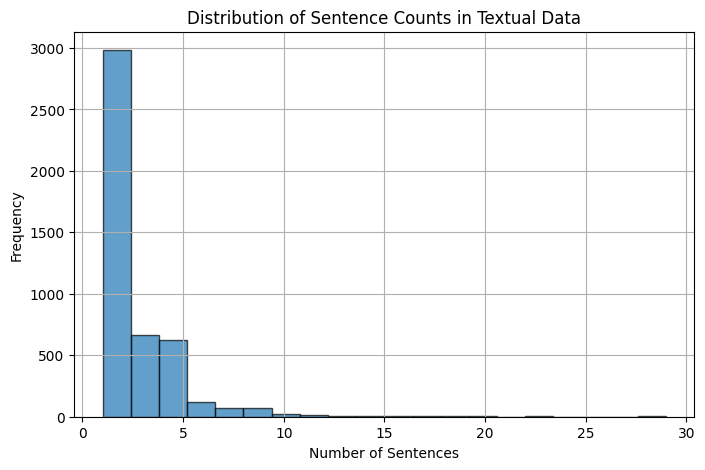

In [ ]:
import re
import matplotlib.pyplot as plt
# Function to count the number of sentences in a text
def count_sentences(text):
    sentences = re.split(r'[.!?]', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

# Apply the function to your text column and create a new column for sentence counts
df['sentence_count'] = df['reviewBody'].apply(count_sentences)

# Plot the distribution of sentence counts
plt.figure(figsize=(8, 5))
plt.hist(df['sentence_count'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Counts in Textual Data')
plt.grid(True)
plt.show()

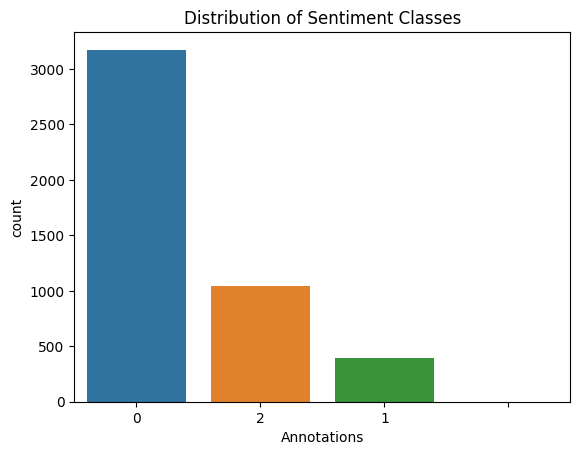

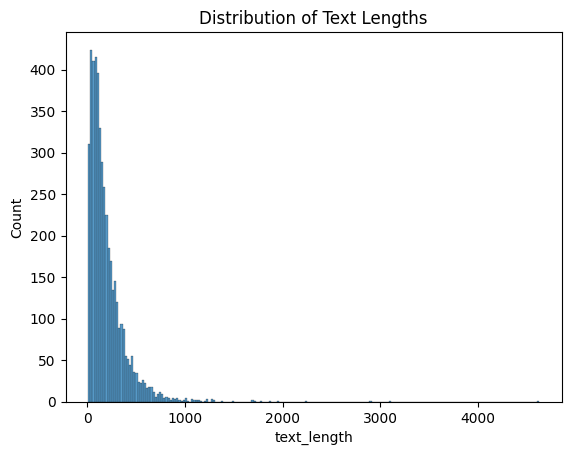

In [ ]:
# Plot the distribution of sentiment classes
import seaborn as sns


sns.countplot(x='Annotations', data=df)
plt.title('Distribution of Sentiment Classes')
plt.show()

# Plot the distribution of text lengths
df['text_length'] = df['reviewBody'].apply(len)
sns.histplot(data=df, x='text_length')
plt.title('Distribution of Text Lengths')
plt.show()

In [ ]:
def sentiment_to_label(sentiment):
    if sentiment == 'positive':
        return 2
    elif sentiment == 'neutral':
        return 1
    else:
        return 0

In [ ]:
def predict_sentiment(text):
    doc = nlp(text)
    sentiment = doc.sentences[0].sentiment
    return (sentiment)

In [ ]:
df['predicted_sentiment'] = df['reviewBody'].apply(predict_sentiment)

In [ ]:
df.head(20)

,reviewBody,Annotations,sentence_count,text_length,predicted_sentiment
0,The lady I spoke to seem to talk over me.Alway...,0,6,391,0
1,Easy website to navigate but holding back pric...,0,2,125,0
2,"nice website and great variety, but payment no...",0,3,190,0
3,"Online redirection form failed first time, app...",0,3,126,0
4,"The site is not very custom frendly,you have t...",0,2,123,0
5,I redirected my post back in March for myself ...,0,5,446,1
6,"Reasonable but could be more user friendly, su...",2,1,201,0
7,Very very expensive,1,1,19,0
8,Wasn't aware that charges were now applicable ...,1,1,87,0
9,Don’t see how you should register just to get ...,0,1,136,0


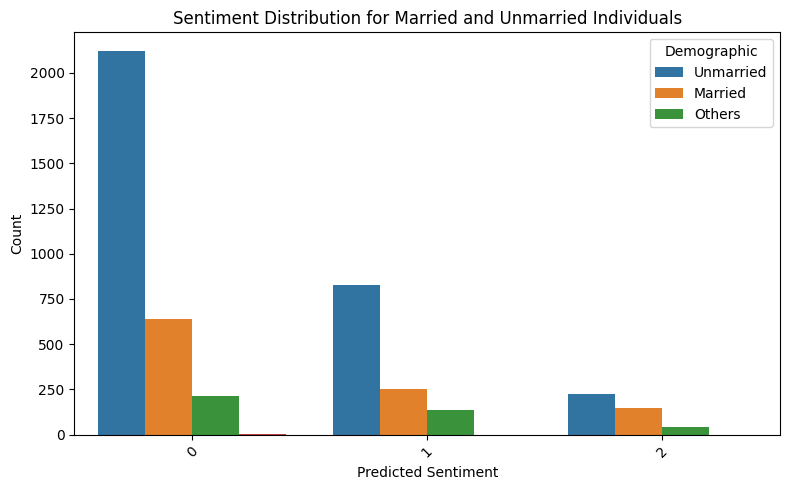

In [ ]:
# Create a bar plot to show sentiment distribution for married and unmarried individuals
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='predicted_sentiment', hue='Annotations')
plt.title('Sentiment Distribution for Married and Unmarried Individuals')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.legend(title='Demographic', labels=['Unmarried', 'Married', 'Others'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Drop rows with predicted sentiment equal to 1 (neutral) and also Annotations equal to 1
df = df.drop(df[(df['predicted_sentiment'] == 1) & (df['Annotations'] == 1)].index)

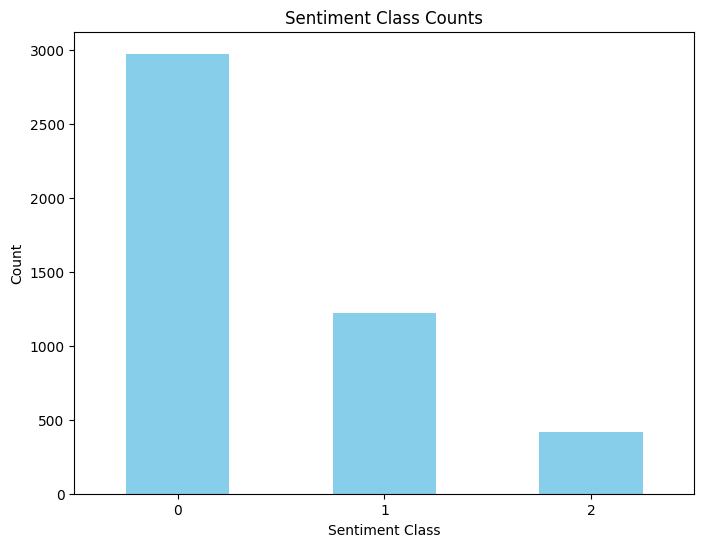

In [ ]:
# Assuming sentiment_counts is the result of df['predicted_sentiment'].value_counts()
sentiment_counts = df['predicted_sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Class Counts')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

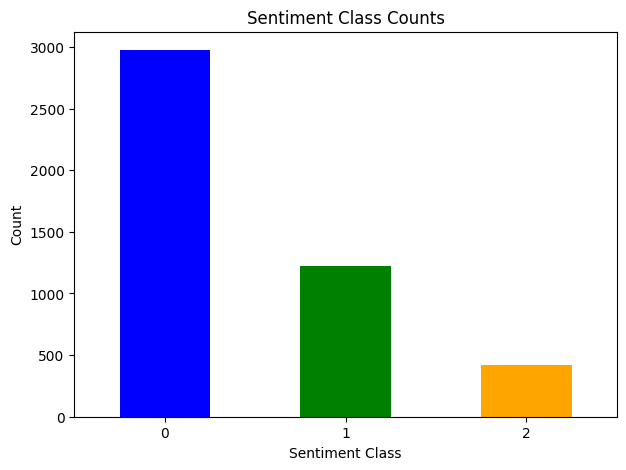

In [ ]:
import matplotlib.pyplot as plt

# Assuming sentiment_counts is the result of df['predicted_sentiment'].value_counts()
sentiment_counts = df['predicted_sentiment'].value_counts()

# Custom colors for each sentiment class
colors = ['blue', 'green', 'orange']

# Plotting
plt.figure(figsize=(7, 5))
sentiment_counts.sort_index().plot(kind='bar', color=colors)
plt.title('Sentiment Class Counts')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
 # Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Print the DataFrame after dropping the rows with neutral sentiment
print(df)

                                             reviewBody Annotations  \
0     The lady I spoke to seem to talk over me.Alway...           0   
1     Easy website to navigate but holding back pric...           0   
2     nice website and great variety, but payment no...           0   
3     Online redirection form failed first time, app...           0   
4     The site is not very custom frendly,you have t...           0   
...                                                 ...         ...   
4605  I have a registered account but still spent ha...           0   
4606  It's not difficul to purchase from Royal Mail ...           0   
4607  It seems that with every order there is an iss...           0   
4608  Items are easy to purchase and delivery is pro...           0   
4609  No next day delivery for stamp collections - c...           0   

      text_length  predicted_sentiment  
0             391                    0  
1             125                    0  
2             190       

In [ ]:
# Assuming 'df' is your DataFrame

print(df['predicted_sentiment'].dtype)

int64


In [ ]:
print(df['Annotations'].dtype)

object


In [ ]:
# converting Annotations to integers
df['Annotations'] = pd.to_numeric(df['Annotations'], errors='coerce').fillna(0).astype(int)

In [ ]:
# creating lists for Human Annotated test and stanza predefined model
actual_values = df['Annotations'].tolist()
predicted_values = df['predicted_sentiment'].tolist()


In [ ]:
from sklearn.metrics import classification_report

# Perform the classification report
report = classification_report(actual_values, predicted_values)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      3176
           1       0.11      0.35      0.17       391
           2       0.36      0.14      0.20      1043

    accuracy                           0.52      4610
   macro avg       0.39      0.38      0.35      4610
weighted avg       0.58      0.52      0.54      4610



In [ ]:
# Count occurrences of each sentiment label
sentiment_counts = df['predicted_sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
0    2975
1    1219
2     416
Name: predicted_sentiment, dtype: int64


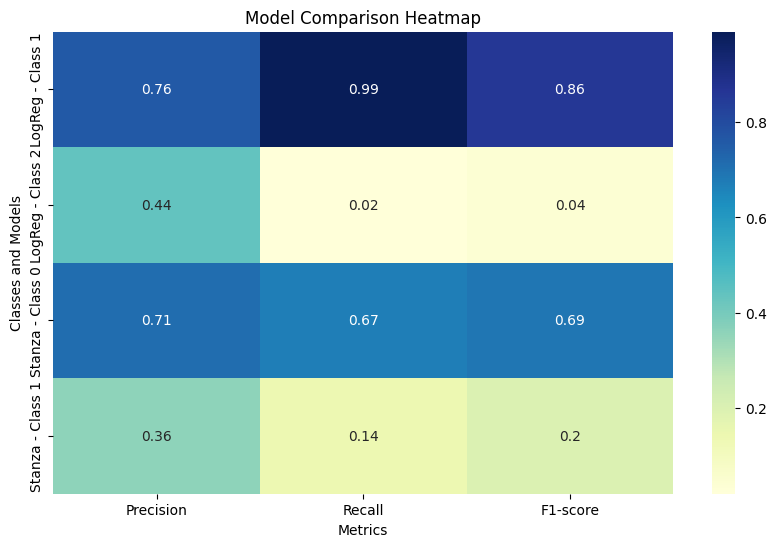

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these lists with your actual classification report metrics
logreg_metrics = [
    [0.76, 0.99, 0.86],   # Precision, Recall, and F1-score values for Logistic Regression (class 1)
    [0.44, 0.02, 0.04]    # Precision, Recall, and F1-score values for Logistic Regression (class 2)
]

stanza_metrics = [
    [0.71, 0.67, 0.69],   # Precision, Recall, and F1-score values for Stanza (class 0)

    [0.36, 0.14, 0.20]    # Precision, Recall, and F1-score values for Stanza (class 2)
]

metric_names = ['Precision', 'Recall', 'F1-score']  # Metric names
class_labels = ['LogReg - Class 1', 'LogReg - Class 2', 'Stanza - Class 0', 'Stanza - Class 1']

# Combine the metrics for both models
all_metrics = logreg_metrics + stanza_metrics

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(all_metrics, annot=True, cmap='YlGnBu', xticklabels=metric_names, yticklabels=class_labels)
plt.xlabel('Metrics')
plt.ylabel('Classes and Models')
plt.title('Model Comparison Heatmap')
plt.show()